<a href="https://colab.research.google.com/github/KevinCY-Kim/Deeplearning/blob/main/Wcloud_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas openpyxl konlpy wordcloud matplotlib gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [1]:
# ===============================
# 0. 라이브러리 설치 (처음 한 번만)
# ===============================
# !pip install pandas openpyxl konlpy wordcloud matplotlib gensim

import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models

# ===============================
# 1. 엑셀 불러오기
# ===============================
# 엑셀 파일: 'articles.xlsx'
# 텍스트가 들어있는 컬럼 이름은 'content'라고 가정
df = pd.read_csv("/content/Wcloud_topic_modeling.csv")
texts = df["content"].dropna().tolist()

In [2]:
# ===============================
# 2. 형태소 분석 (명사 추출)
# ===============================
okt = Okt()
tokenized_texts = []

for text in texts:
    tokens = okt.nouns(text)  # 명사만 추출
    tokens = [t for t in tokens if len(t) > 1]  # 한 글자 단어 제거
    tokenized_texts.append(tokens)

In [10]:
# ===============================
# 3. 워드클라우드
# ===============================
import os

font_path = "/content/NanumGothic.ttf"

if os.path.exists(font_path):
    print(f"Font file found at: {font_path}")
else:
    print(f"Font file not found at: {font_path}")
    print("Please upload the font file to this location.")

Font file found at: /content/NanumGothic.ttf


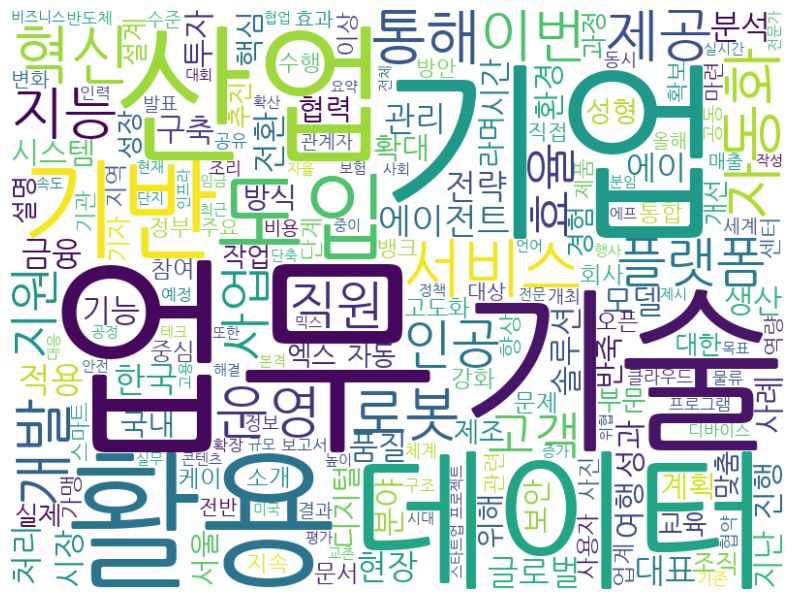

In [11]:
all_tokens = [token for sublist in tokenized_texts for token in sublist]
counter = Counter(all_tokens)

wc = WordCloud(
    font_path="/content/NanumGothic.ttf",  # 한글 폰트 경로
    background_color="white",
    width=800,
    height=600
)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(counter), interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
# ===============================
# 4. 토픽 모델링 (LDA)
# ===============================
# 단어 사전 & 말뭉치 생성
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# LDA 모델 학습 (토픽 5개 가정)
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# 토픽 출력
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"토픽 {idx}: {topic}")


토픽 0: 0.015*"기업" + 0.009*"업무" + 0.008*"데이터" + 0.008*"에이전트" + 0.008*"기술" + 0.006*"기반" + 0.006*"서비스" + 0.005*"대표" + 0.005*"솔루션" + 0.005*"개발"
토픽 1: 0.013*"업무" + 0.010*"케이" + 0.010*"활용" + 0.010*"뱅크" + 0.009*"사례" + 0.009*"직원" + 0.009*"기술" + 0.008*"적용" + 0.007*"소개" + 0.006*"임금"
토픽 2: 0.037*"산업" + 0.022*"데이터" + 0.016*"처리" + 0.015*"기술" + 0.010*"단지" + 0.009*"한국" + 0.008*"자동화" + 0.007*"전환" + 0.007*"혁신" + 0.006*"지능"
토픽 3: 0.033*"로봇" + 0.020*"반죽" + 0.018*"도입" + 0.014*"가맹" + 0.012*"조리" + 0.011*"자동화" + 0.011*"교촌" + 0.010*"에프" + 0.010*"믹스" + 0.010*"효율"
토픽 4: 0.017*"업무" + 0.011*"혁신" + 0.011*"활용" + 0.011*"기반" + 0.010*"서비스" + 0.009*"지능" + 0.008*"여행" + 0.008*"인공" + 0.007*"플랫폼" + 0.007*"제공"


In [13]:
for i, row in enumerate(lda_model[corpus]):
    print(f"문서 {i} 토픽 분포: {row}")

문서 0 토픽 분포: [(0, 0.24955957), (4, 0.7456661)]
문서 1 토픽 분포: [(0, 0.66287553), (3, 0.33331358)]
문서 2 토픽 분포: [(0, 0.9593886), (1, 0.037803963)]
문서 3 토픽 분포: [(0, 0.99602926)]
문서 4 토픽 분포: [(4, 0.9935619)]
문서 5 토픽 분포: [(4, 0.9960012)]
문서 6 토픽 분포: [(0, 0.996824)]
문서 7 토픽 분포: [(4, 0.9942137)]
문서 8 토픽 분포: [(2, 0.9968785)]
문서 9 토픽 분포: [(4, 0.9944394)]
문서 10 토픽 분포: [(2, 0.9982803)]
문서 11 토픽 분포: [(0, 0.8722438), (4, 0.12449083)]
문서 12 토픽 분포: [(4, 0.98772424)]
문서 13 토픽 분포: [(0, 0.1155427), (3, 0.88064796)]
문서 14 토픽 분포: [(4, 0.9935347)]
문서 15 토픽 분포: [(0, 0.8811586), (4, 0.1155889)]
문서 16 토픽 분포: [(4, 0.9947953)]
문서 17 토픽 분포: [(4, 0.99385136)]
문서 18 토픽 분포: [(0, 0.96489704), (1, 0.031729195)]
문서 19 토픽 분포: [(0, 0.2887813), (4, 0.70797396)]
문서 20 토픽 분포: [(4, 0.9923398)]
문서 21 토픽 분포: [(0, 0.64315647), (2, 0.06283518), (4, 0.29243264)]
문서 22 토픽 분포: [(0, 0.9954787)]
문서 23 토픽 분포: [(0, 0.82711494), (4, 0.17034583)]
문서 24 토픽 분포: [(0, 0.9980007)]
문서 25 토픽 분포: [(0, 0.8160714), (4, 0.17852293)]
문서 26 토픽 분포: [(0, 0

In [14]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2500957616.py:18: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

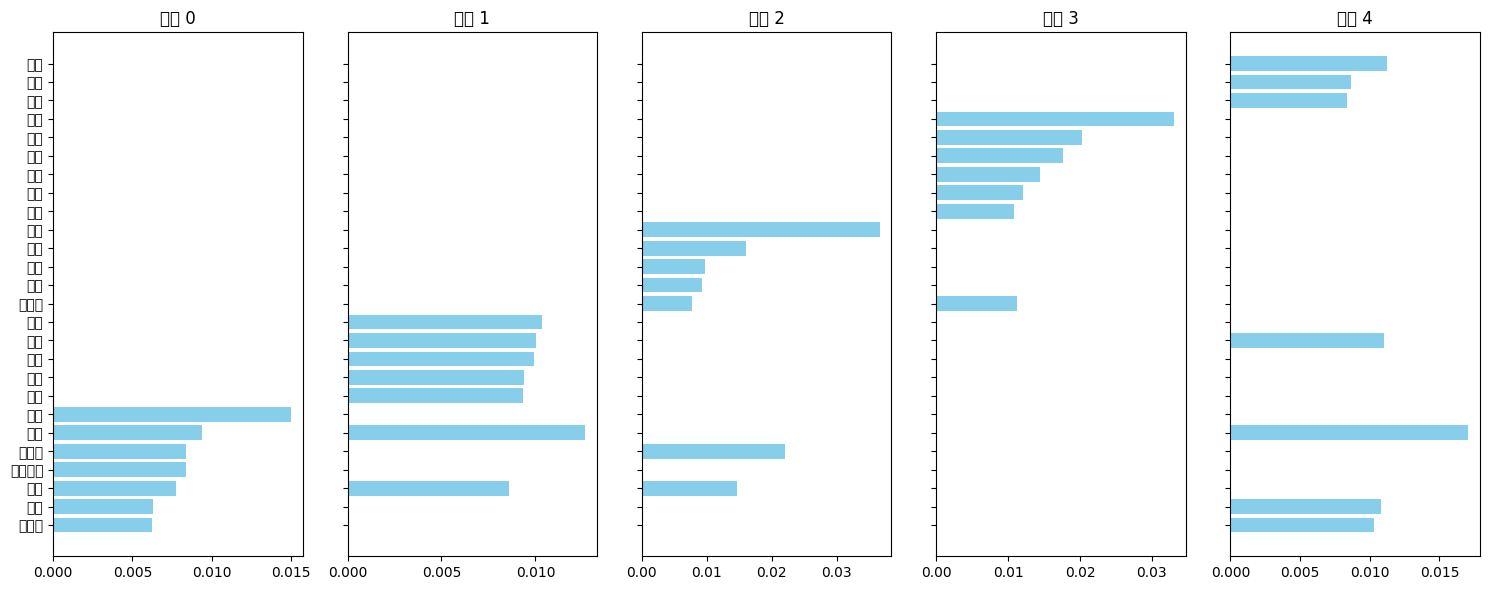

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# 토픽별 상위 단어 추출
topics = lda_model.show_topics(formatted=False, num_words=7)

fig, axes = plt.subplots(1, len(topics), figsize=(15, 6), sharey=True)

font_path="/content/NanumGothic.ttf"

for i, (topic_id, words) in enumerate(topics):
    df = pd.DataFrame(words, columns=["단어", "가중치"])
    df = df.sort_values("가중치", ascending=True)

    axes[i].barh(df["단어"], df["가중치"], color="skyblue")
    axes[i].set_title(f"토픽 {topic_id}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


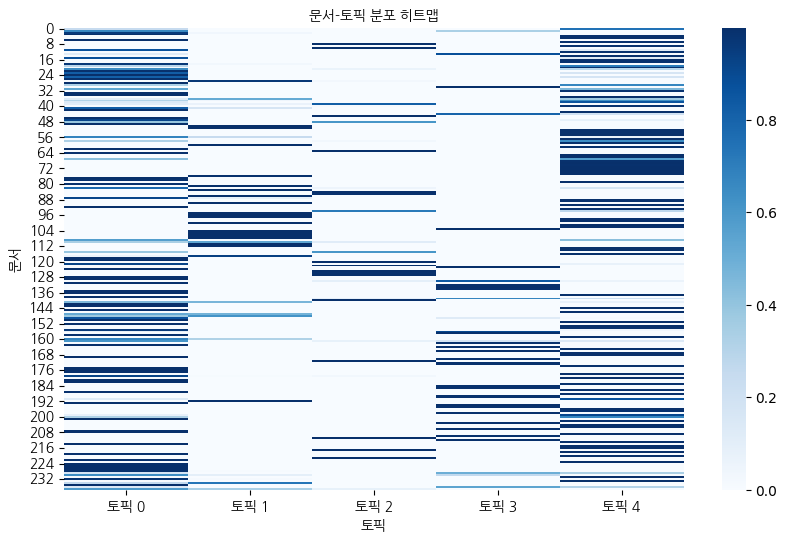

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 문서별 토픽 분포 계산
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# 행: 문서, 열: 토픽
matrix = []
for row in doc_topics:
    row_dict = {topic_id: prob for topic_id, prob in row}
    matrix.append([row_dict.get(i, 0) for i in range(lda_model.num_topics)])

df = pd.DataFrame(matrix, columns=[f"토픽 {i}" for i in range(lda_model.num_topics)])

# 한글 폰트 설정
font_path = "/content/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10,6))
ax = sns.heatmap(df, cmap="Blues", cbar=True)
plt.title("문서-토픽 분포 히트맵", fontproperties=fontprop)
plt.xlabel("토픽", fontproperties=fontprop)
plt.ylabel("문서", fontproperties=fontprop)

# 축 레이블에 폰트 적용
for label in ax.get_xticklabels():
    label.set_fontproperties(fontprop)
for label in ax.get_yticklabels():
    label.set_fontproperties(fontprop)

plt.show()

In [37]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)